In [2]:
import pandas as pd
import numpy as np

# 전체 직군 stack, 우대사항 합본 생성

In [3]:
prefer = pd.read_csv("data/원티드_채용공고_합본.csv")
prefer

,company,job_name,city,stack,NCS_code,link,no
0,이노팸,머신러닝 엔지니어,서울,Java,20010701,https://www.wanted.co.kr/wd/183398,1
1,이노팸,머신러닝 엔지니어,서울,Java,20010706,https://www.wanted.co.kr/wd/183398,2
2,이노팸,머신러닝 엔지니어,서울,Python,20010701,https://www.wanted.co.kr/wd/183398,3
3,이노팸,머신러닝 엔지니어,서울,Python,20010706,https://www.wanted.co.kr/wd/183398,4
4,루닛(Lunit),머신러닝 엔지니어,서울,Pytorch,20010701,https://www.wanted.co.kr/wd/183295,5
...,...,...,...,...,...,...,...
16156,워트인텔리전스,데이터 엔지니어(DBA),서울,ElasticSearch,20010209,https://www.wanted.co.kr/wd/26823,16157
16157,워트인텔리전스,데이터 엔지니어(DBA),서울,ElasticSearch,20010211,https://www.wanted.co.kr/wd/26823,16158
16158,워트인텔리전스,데이터 엔지니어(DBA),서울,Spring Framework,20010204,https://www.wanted.co.kr/wd/26823,16159
16159,워트인텔리전스,데이터 엔지니어(DBA),서울,Spring Framework,20010209,https://www.wanted.co.kr/wd/26823,16160


In [4]:
# 민혁님 크롤링
DBA = pd.read_csv("data/wanted_crawling_DBA_pre.csv") # DE 로 통일
DE = pd.read_csv("data/wanted_crawling_DE_pre.csv") # DE 로 통일
MLE = pd.read_csv("data/wanted_crawling_MLE_pre.csv")

In [5]:
# 제욱 크롤링
BigData_ENG = pd.read_csv("data/BigData_ENG.csv") # DE 로 통일
Data_ANL = pd.read_csv("data/Data_ANL.csv")
Data_SCI = pd.read_csv("data/Data_SCI.csv")

In [6]:
MLE

,stack,preference,region
0,NaN,NaN,NaN
1,C++\nROS,"• 석사 이상의 학력 혹은 3년 이상의 경력\n• 모션 제어, 최적 제어, 경로 생...",인천.한국
2,Git\nDjango\nPytorch\nHTML\nJavaScript\nPython...,"• R&D, 납품 용역 과제 수행 및 관리 경험\n• AI 관련 석사학위 이상의 연...",대전.한국
3,NaN,1) 영상 등 다양한 데이터를 많이 다뤄 보신 분\n2) Mobile/Embedde...,경기.한국
4,Pytorch\nTensorflow\nPython,• 분산 학습 시스템을 개발한 경험\n• 기계학습 분야에서 좋은 연구 트랙 레코드를...,서울.한국
...,...,...,...
374,Docker,• CSE 관련 전공자\n• 자신의 기술에 대해 설명이 가능한 정도의 영어\n• 머...,서울.한국
375,Git\nPython\nAWS\nDocker,• 이공계 석사 이상 학위 보유자\n• 의료/보건 통계 관련 기초 지식 보유 또는 ...,서울.한국
376,NaN,"- 데이터 사이언스 관련 전공자\n- 퍼블릭 클라우드 환경 (GCP, AWS, Az...",서울.한국
377,Android\niOS\nJava\nJavaScript\nPython\nTypeSc...,- 인공지능 업계 경험\n- 머신러닝 관련 분야의 석/박사 학위 또는 그에 준하는 ...,서울.한국


- 컬럼명 민혁님 컬럼과 통일

In [7]:
BigData_ENG = BigData_ENG.drop(columns = ['company', 'url'])
Data_ANL = Data_ANL.drop(columns = ['company', 'url'])
Data_SCI = Data_SCI.drop(columns = ['company', 'url'])

In [8]:
BigData_ENG = BigData_ENG[['tool', 'prefer', 'location']]
Data_ANL = Data_ANL[['tool', 'prefer', 'location']]
Data_SCI = Data_SCI[['tool', 'prefer', 'location']]

In [9]:
BigData_ENG.columns = ['stack', 'preference', 'region']
Data_ANL.columns = ['stack', 'preference', 'region']
Data_SCI.columns = ['stack', 'preference', 'region']

In [10]:
BigData_ENG.head(2)

,stack,preference,region
0,Confluence\nGit\nGitLab\nJIRA\nPython\nSQL\nNL...,• 금융 도메인 경험이 있으신 분\n• 주식 투자에 대한 관심과 경험이 있으신 분\...,서울.한국
1,Git\nDjango\nPytorch\nHTML\nJavaScript\nPython...,"• R&D, 납품 용역 과제 수행 및 관리 경험\n• AI 관련 석사학위 이상의 연...",대전.한국


- DBA, 데이터 엔지니어, 빅데이터 엔지니어 -> 데이터 엔지니어 직군 하나로 통일

In [11]:
DE = pd.concat([DBA, DE, BigData_ENG], ignore_index = True)
DE

,stack,preference,region
0,NaN,NaN,NaN
1,MySQL\nAWS\nScripting\n서버\nNoSQL\n네트워크 개발,"• 기본적인 수준의 Script언어 능력\n• 클라우드 환경 운영(AWS, NAVE...",서울.한국
2,데이터베이스\nC++\nWindows 서버\nSTL\nMSSQL,• 게임 DB 개발 경험 있으신 분\n• 상용 게임 오픈 경력 있으신 분\n• Mo...,서울.한국
3,Git\nLinux\nReact\nJavaScript\nSQL\nSpring Fra...,• 금융업무 경험자\n• 대용량 데이타 마이그레이션 경험자\n• 대규모 트래픽 처리,서울.한국
4,MySQL\nPostgreSQL,• DBA경력 1년 이상\n• 관련 학과 졸업\n• DB 관련 교육 기관 수료\n•...,서울.한국
...,...,...,...
604,MySQL\nOracle\nReact\nJava\nJavaScript\nKotlin...,- Full-Stack 개발자\n- 검색엔진으로 서비스 진행 경험\n- 유지보수를 ...,서울.한국
605,NaN,- 이기종 데이터베이스 마이그레이션 경험이 있으신 분\n- 대용량 트래픽 처리를 위...,서울.한국
606,MySQL\nOracle\nReact\nJava\nJavaScript\nKotlin...,- 대량의 데이터를 파이프라인으로 다뤄본 경험\n- 검색엔진을 다뤄본 경험\n- 데...,서울.한국
607,NaN,• Big Data 관련 개발 경험 및 관련 Open Source 사용 경험\n• ...,서울.한국


- 전체 직군 통합 stack, 우대사항 추출을 위해 concat 하여 하나의 DF생성

In [12]:
all_pre = pd.concat([DE, MLE, Data_ANL, Data_SCI], ignore_index = True)
all_pre

,stack,preference,region
0,NaN,NaN,NaN
1,MySQL\nAWS\nScripting\n서버\nNoSQL\n네트워크 개발,"• 기본적인 수준의 Script언어 능력\n• 클라우드 환경 운영(AWS, NAVE...",서울.한국
2,데이터베이스\nC++\nWindows 서버\nSTL\nMSSQL,• 게임 DB 개발 경험 있으신 분\n• 상용 게임 오픈 경력 있으신 분\n• Mo...,서울.한국
3,Git\nLinux\nReact\nJavaScript\nSQL\nSpring Fra...,• 금융업무 경험자\n• 대용량 데이타 마이그레이션 경험자\n• 대규모 트래픽 처리,서울.한국
4,MySQL\nPostgreSQL,• DBA경력 1년 이상\n• 관련 학과 졸업\n• DB 관련 교육 기관 수료\n•...,서울.한국
...,...,...,...
1380,Git\nPython\nAWS\nDocker,• 이공계 석사 이상 학위 보유자\n• 의료/보건 통계 관련 기초 지식 보유 또는 ...,서울.한국
1381,NaN,[이런 분이라면 더 좋아요!]\n• AWS/GCP 등 클라우드 환경에서 데이터 플랫...,경기.한국
1382,NaN,"- 데이터 사이언스 관련 전공자\n- 퍼블릭 클라우드 환경 (GCP, AWS, Az...",서울.한국
1383,NaN,• ML 관련 Top-tier 학회 및 저널 Publication 실적\n(Neur...,서울.한국


- 지역 확인

In [13]:
all_pre['region'] = all_pre['region'].str.slice(0, 2)
all_pre

,stack,preference,region
0,NaN,NaN,NaN
1,MySQL\nAWS\nScripting\n서버\nNoSQL\n네트워크 개발,"• 기본적인 수준의 Script언어 능력\n• 클라우드 환경 운영(AWS, NAVE...",서울
2,데이터베이스\nC++\nWindows 서버\nSTL\nMSSQL,• 게임 DB 개발 경험 있으신 분\n• 상용 게임 오픈 경력 있으신 분\n• Mo...,서울
3,Git\nLinux\nReact\nJavaScript\nSQL\nSpring Fra...,• 금융업무 경험자\n• 대용량 데이타 마이그레이션 경험자\n• 대규모 트래픽 처리,서울
4,MySQL\nPostgreSQL,• DBA경력 1년 이상\n• 관련 학과 졸업\n• DB 관련 교육 기관 수료\n•...,서울
...,...,...,...
1380,Git\nPython\nAWS\nDocker,• 이공계 석사 이상 학위 보유자\n• 의료/보건 통계 관련 기초 지식 보유 또는 ...,서울
1381,NaN,[이런 분이라면 더 좋아요!]\n• AWS/GCP 등 클라우드 환경에서 데이터 플랫...,경기
1382,NaN,"- 데이터 사이언스 관련 전공자\n- 퍼블릭 클라우드 환경 (GCP, AWS, Az...",서울
1383,NaN,• ML 관련 Top-tier 학회 및 저널 Publication 실적\n(Neur...,서울


In [14]:
all_pre['region'].value_counts()

서울    1170
경기     167
대전      17
인천      14
부산       3
경남       2
대구       1
충남       1
제주       1
Name: region, dtype: int64

- stack 추출

In [15]:
# stack이 nan아닌 값 추출, 개행문자 제거
stacks = all_pre.loc[~(all_pre['stack'].isnull()), 'stack'].str.split('\n', regex=True)
stacks

1             [MySQL, AWS, Scripting, 서버, NoSQL, 네트워크 개발]
2                   [데이터베이스, C++, Windows 서버, STL, MSSQL]
3       [Git, Linux, React, JavaScript, SQL, Spring Fr...
4                                     [MySQL, PostgreSQL]
5       [Git, Github, MongoDB, MySQL, Pytorch, Scikit-...
                              ...                        
1376                         [Git, Python, SQL, AWS, GCP]
1377    [Android, GraphQL, iOS, JavaScript, TypeScript...
1378                                 [Linux, Python, AWS]
1379               [Git, MySQL, Redis, Node.js, AWS, GCP]
1380                           [Git, Python, AWS, Docker]
Name: stack, Length: 919, dtype: object

In [16]:
# 하나의 리스트 형식으로 저장
stack_list = []
for i in stacks:
    for j in i:
        stack_list.append(j)
stack_list

['MySQL',
 'AWS',
 'Scripting',
 '서버',
 'NoSQL',
 '네트워크 개발',
 '데이터베이스',
 'C++',
 'Windows 서버',
 'STL',
 'MSSQL',
 'Git',
 'Linux',
 'React',
 'JavaScript',
 'SQL',
 'Spring Framework',
 'MySQL',
 'PostgreSQL',
 'Git',
 'Github',
 'MongoDB',
 'MySQL',
 'Pytorch',
 'Scikit-Learn',
 'JavaScript',
 'Node.js',
 'R',
 'SQL',
 'AWS',
 'Jenkins',
 'NoSQL',
 'Apache',
 'Docker',
 'JUnit',
 'MSSQL',
 'Kubernetes',
 'MySQL',
 'PostgreSQL',
 'React',
 'Spring Framework',
 'Pytorch',
 'Tensorflow',
 'C / C++',
 'Java',
 'Python',
 'GIS',
 'OpenCV',
 '네비게이션 시스템',
 'GIS 시스템',
 'GIS 응용 프로그램',
 'Oracle',
 'SQL',
 'Azure',
 'Java',
 'Python',
 'Scala',
 'AWS',
 'Docker',
 'GCP',
 'Kubernetes',
 'SAP',
 'Java',
 'JSP',
 'JSP 개발',
 'MMO',
 '기술 관리',
 '프로젝트 관리',
 'RPG',
 '모바일 게임',
 'MySQL',
 'Java',
 'JavaScript',
 'Python',
 'SQL',
 'AWS',
 'Spring Boot',
 'Restful API',
 'MySQL',
 'SQL',
 'SQL 튜닝',
 'Java',
 'Spring Framework',
 'React.js',
 'Vue.JS',
 'iOS',
 'HTML',
 'JavaScript',
 'SQL',
 'API',
 'DSL'

In [17]:
# 데이터프레임 형식으로 변환
stacks_count = pd.DataFrame(pd.Series(data=stack_list).value_counts()).reset_index()
stacks_count

,index,0
0,Python,517
1,AWS,355
2,Git,218
3,JavaScript,192
4,Java,187
...,...,...
437,소프트웨어 공학,1
438,컴퓨터 공학,1
439,RESTful Architecture,1
440,OOP,1


In [18]:
stacks_count.columns= ['stack', 'count']
stacks_count['stack'].unique()

array(['Python', 'AWS', 'Git', 'JavaScript', 'Java', 'SQL', 'React',
       'MySQL', 'Docker', 'Pytorch', 'TypeScript', 'Linux', 'Github',
       'Spring Framework', 'Tensorflow', 'C++', 'Node.js', 'HTML',
       'PostgreSQL', 'Kubernetes', 'Kotlin', 'Android', 'JIRA', 'GCP',
       'CSS', 'iOS', 'C / C++', 'Swift', 'MongoDB', 'C', 'Next.js',
       'Azure', 'React.js', 'Spark', 'ElasticSearch', 'Tableau', 'DevOps',
       'Oracle', 'API', 'Spring Boot', 'Confluence', 'Google Analytics',
       'React Native', 'Hadoop', 'Notion', 'Slack', 'NoSQL', 'Jenkins',
       'NodeJS', '데이터 분석', 'R', 'MSSQL', 'C#', 'Django', 'Restful API',
       'Redis', 'OpenCV', 'Flask', 'RDBMS', 'Golang', 'VueJS', 'FastAPI',
       'GitLab', 'SAP', 'Figma', 'JPA', 'NumPy', 'PHP', 'Vue.JS',
       'Scikit-Learn', 'Data Analysis', 'NLP', 'Nest.js', 'Scala', 'ML',
       'Redux', 'Google Cloud Platform', 'BI', '데이터베이스 관리', 'MVVM',
       'GraphQL', 'ObjectiveC', 'CUDA', '데이터베이스', 'HTML5', 'Apache',
       'Produ

- 무의미한 stack 제거, 바꿀 stack명 변경

In [19]:
# 삭제 할 스택 명 
del_stack = ['데이터 분석', 'Data Analysis', '검증', '카메라', '프로젝트', '정부', '제품', '보안', 'SAP',
             'Leadership', '네비게이션', '금융', 'CCTV', '수학', '콘텐츠', '개인화', '학습', '최적화',
             '인프라', '강의', '학술', '반도체', '의료', '고객', '문서', '해결', '교육', '과학', '관리',
             '분석', '모델링', 'RTL', '펌웨어', '개발', '조사', 'SCM', '유지보수', '설계', '재무 제표', '차량',
             '기획', '컴파일러', '소켓', '운영', '작성', '컨설팅', '사무', 'FPGA', '공학', '로봇', '은행', '재무',
             '사업', '카지노', '플레이', '빌딩', '시장', '백 오피스', '임베디드', '손익', '신용', '테스트',
             '리팩토링', '백신', '구조', '데이터', '통계', 'QA 엔지니어링', 'MVVM', 'Product Management', 'EDA', 'API', 'DevOps', 'Agile', ]

# 바꿀 스택 명
change_stack = {'RESTful WebServices':'RESTful API', 'RESTful Architecture':'RESTful API', 'REST':'RESTful API',
                'Excel':'MS Office', '프론트엔드 개발자':'Web', '백엔드 개발':'Web', '인공 지능':'AI', '영어 실력':'제2외국어', '데이터베이스':'DB',
                '데이터베이스 관리':'DB', '딥 러닝':'ML/DL', '컴퓨터 비전':'OpenCV', 'SQL 서버':'SQL', 'MS 오피스':'MS Office',
                'iOS 개발':'iOS', '데이터베이스 설계':'DB', '데이터베이스 개발':'DB', '카산드라':'Cassandra', '웹 개발':'Web',
                'SQL DB2':'DB2', '엑셀 모델':'MS Office', 'GIS 시스템':'GIS', 'GIS 응용 시스템':'GIS', 'GIS 응용 프로그램':'GIS',
                '기계 학습 (Machine Learning)':'ML/DL', '모바일 게임 개발':'Mobile', '모바일 게임':'Mobile',
                'Microsoft Word':'MS Office', '다국어':'제2외국어', '앱 서버':'Mobile', '리눅스 서버':'Linux', '클라우드 응용 프로그램':'Cloud',
                '안드로이드 개발':'Android', '안드로이드 SDK':'Android', 'EC2':'AWS', '모바일 기술':'Mobile',
                'CSS3':'CSS', 'iOS 디자인':'iOS', '서버 아키텍처':'OS', 'PowerPoint':'MS Office', 'HTML 5':'HTML',
                '데이터 마트':'DB', '이미지 처리':'ML/DL', '신호 처리':'ML/DL', 'Android Studio':'Android',
                '자연 언어 처리':'ML/DL', 'ML':'ML/DL', 'UI 디자인':'UX/UI', 'UX':'UX/UI', 'DWDM':'DB', 'HTML5':'HTML',
                'Golang':'Go', 'Apple Software':'iOS', '언어학':'제2외국어', '서버':'Server', 'C / C++':'C/C++', 'Embeded C':'C/C++', 'C++':'C/C++', 'C':'C/C++',
                'Embedded Linux':'Linux', 'GCP':'Google Cloud Platform', 'Apache 2':'Apache', 'Apache Spark':'Spark', 'Apache Kafka':'Kafka'}

for k, v in change_stack.items():
    stacks_count.loc[stacks_count['stack'] == k, 'stack'] = v

# 제거 할 스택이 포함 된 경우 -> 스택명을 'delete'로 변환
for i in del_stack:
    stacks_count.loc[stacks_count['stack'].str.contains(i), 'stack'] = 'delete'

stacks_count['stack'].unique()

array(['Python', 'AWS', 'Git', 'JavaScript', 'Java', 'SQL', 'React',
       'MySQL', 'Docker', 'Pytorch', 'TypeScript', 'Linux', 'Github',
       'Spring Framework', 'Tensorflow', 'C/C++', 'Node.js', 'HTML',
       'PostgreSQL', 'Kubernetes', 'Kotlin', 'Android', 'JIRA',
       'Google Cloud Platform', 'CSS', 'iOS', 'Swift', 'MongoDB',
       'Next.js', 'Azure', 'React.js', 'Spark', 'ElasticSearch',
       'Tableau', 'delete', 'Oracle', 'Spring Boot', 'Confluence',
       'Google Analytics', 'React Native', 'Hadoop', 'Notion', 'Slack',
       'NoSQL', 'Jenkins', 'NodeJS', 'R', 'MSSQL', 'C#', 'Django',
       'Redis', 'OpenCV', 'Flask', 'RDBMS', 'Go', 'VueJS', 'GitLab',
       'Figma', 'JPA', 'NumPy', 'PHP', 'Vue.JS', 'Scikit-Learn', 'NLP',
       'Nest.js', 'Scala', 'ML/DL', 'Redux', 'BI', 'DB', 'GraphQL',
       'ObjectiveC', 'CUDA', 'Apache', 'AI', 'OpenStack', 'Web', '.NET',
       'CISA', 'ORM', 'Ubuntu', 'Framer', 'ROS', 'MS Office',
       'Shell Scripting', 'ExpressJS', 'BitBuck

- 'CSS 자바 스크립트' 스택명의 경우 -> CSS, JavaScripts에 각각 하나씩 추가

In [20]:
stacks_count.loc[stacks_count['stack'] == 'CSS 자바 스크립트']

,stack,count
211,CSS 자바 스크립트,4


In [21]:
stacks_count.loc[(stacks_count['stack'] == 'CSS') | (stacks_count['stack'] == 'JavaScript')]

,stack,count
3,JavaScript,192
24,CSS,61
132,CSS,8


In [22]:
stacks_count = stacks_count.groupby('stack', sort=False).sum().reset_index()
stacks_count.loc[(stacks_count['stack'] == 'CSS') | (stacks_count['stack'] == 'JavaScript'), 'count'] += 4

In [23]:
stacks_count.loc[(stacks_count['stack'] == 'CSS') | (stacks_count['stack'] == 'JavaScript')]

,stack,count
3,JavaScript,196
24,CSS,73


In [24]:
stacks_count.loc[stacks_count['stack'] == 'CSS 자바 스크립트', 'stack'] = 'delete'

In [25]:
# 제거 할 스택 'delete'를 제외 한 나머지 확인

stacks_final = stacks_count.loc[stacks_count['stack'] != 'delete'].reset_index(drop=True)
stacks_final['stack'].unique()

array(['Python', 'AWS', 'Git', 'JavaScript', 'Java', 'SQL', 'React',
       'MySQL', 'Docker', 'Pytorch', 'TypeScript', 'Linux', 'Github',
       'Spring Framework', 'Tensorflow', 'C/C++', 'Node.js', 'HTML',
       'PostgreSQL', 'Kubernetes', 'Kotlin', 'Android', 'JIRA',
       'Google Cloud Platform', 'CSS', 'iOS', 'Swift', 'MongoDB',
       'Next.js', 'Azure', 'React.js', 'Spark', 'ElasticSearch',
       'Tableau', 'Oracle', 'Spring Boot', 'Confluence',
       'Google Analytics', 'React Native', 'Hadoop', 'Notion', 'Slack',
       'NoSQL', 'Jenkins', 'NodeJS', 'R', 'MSSQL', 'C#', 'Django',
       'Redis', 'OpenCV', 'Flask', 'RDBMS', 'Go', 'VueJS', 'GitLab',
       'Figma', 'JPA', 'NumPy', 'PHP', 'Vue.JS', 'Scikit-Learn', 'NLP',
       'Nest.js', 'Scala', 'ML/DL', 'Redux', 'BI', 'DB', 'GraphQL',
       'ObjectiveC', 'CUDA', 'Apache', 'AI', 'OpenStack', 'Web', '.NET',
       'CISA', 'ORM', 'Ubuntu', 'Framer', 'ROS', 'MS Office',
       'Shell Scripting', 'ExpressJS', 'BitBucket', '제2외국

In [26]:
stacks_final.loc[len(stacks_final)] = ['Airflow', 0]
stacks_final

,stack,count
0,Python,517
1,AWS,357
2,Git,218
3,JavaScript,196
4,Java,187
...,...,...
241,GPU,1
242,SPICE,1
243,OOP,1
244,WebSphere MQ,1


- 우대사항에서 스택 추출
    - stack의 값이 nan인 경우 우대사항에서 stack 추출
    - ex : stack이 Nan, 우대사항이 'MongoDB 경험이 있으시면 더 좋습니다' 인경우 'MongoDB' 추출하여 stack에 추가

In [27]:
stacks_list = stacks_final['stack'].to_list()

In [28]:
# stack이 NaN인 값들의 우대사항만 추출

no_stack = all_pre.loc[all_pre['stack'].isnull()]
no_stack = no_stack[['preference']].reset_index(drop=True)
no_stack.dropna(axis=0, how='all', inplace=True)
no_stack = no_stack[['preference']].reset_index(drop=True)
no_stack

,preference
0,"• DB 모니터링 프로세스 구축 및 관제 경험이 있는 분\n• SQLD , DAP,..."
1,- 전형절차\n • 서류전형 ＞ 필기전형(SKCT) ＞ 면접전형 ＞ 처우협의 ＞ 채...
2,- 전형절차\n • 서류전형 ＞ 필기전형(SKCT) ＞ 면접전형 ＞ 처우협의 ＞ 채...
3,• 게임 서비스 DB 작업 경험이 있으신 분\n• 대규모 데이터 기반 DB 작업 경...
4,• MongoDB 경험이 있으시면 더 좋습니다.\n• 금융/핀테크 및 커머스 서비스...
...,...
449,• 휴가사용은 자유롭게 + (무급) 휴가 무제한\n• 동료와 원활한 협업을 위해 1...
450,"- 슬랙(Slack), 노션(Notion), 지라(Jira), 피그마(Figma) ..."
451,[이런 분이라면 더 좋아요!]\n• AWS/GCP 등 클라우드 환경에서 데이터 플랫...
452,"- 데이터 사이언스 관련 전공자\n- 퍼블릭 클라우드 환경 (GCP, AWS, Az..."


In [29]:
import re

for i in stacks_list: # 이전에 추출한 스택리스트를 for문으로 하나씩 가져옴
    # i가 정규 표현식 패턴이라면 이스케이프 처리
    i_pattern = re.escape(i)

    # 우대사항에 스택리스트의 글자가 포함된 수먼쿰 i_count에 더함
    i_count = no_stack['preference'].str.contains(i_pattern).sum()
    # i_count 만큼 스택리스트의 해당 스택에 더해줌 
    stacks_final.loc[stacks_final['stack'] == i, 'count'] += i_count 
stacks_final

,stack,count
0,Python,568
1,AWS,420
2,Git,240
3,JavaScript,200
4,Java,212
...,...,...
241,GPU,8
242,SPICE,1
243,OOP,1
244,WebSphere MQ,1


In [30]:
all_stack = stacks_final

In [31]:
all_stack.to_csv("all_stack.csv", encoding='utf-8', index = False)

# 각 직군 별 우대사항, 스택 합본 생성

- 함수 생성

In [32]:
def count_maker(df):
    stacks = df.loc[~(df['stack'].isnull()), 'stack'].str.split('\n', regex=True)

    stack_list = []
    for i in stacks:
        for j in i:
            stack_list.append(j)
    stacks_count = pd.DataFrame(pd.Series(data=stack_list).value_counts()).reset_index()
    stacks_count.columns = ['stack', 'count']

    del_stack = ['데이터 분석', 'Data Analysis', '검증', '카메라', '프로젝트', '정부', '제품', '보안', 'SAP',
                'Leadership', '네비게이션', '금융', 'CCTV', '수학', '콘텐츠', '개인화', '학습', '최적화',
                '인프라', '강의', '학술', '반도체', '의료', '고객', '문서', '해결', '교육', '과학', '관리',
                '분석', '모델링', 'RTL', '펌웨어', '개발', '조사', 'SCM', '유지보수', '설계', '재무 제표', '차량',
                '기획', '컴파일러', '소켓', '운영', '작성', '컨설팅', '사무', 'FPGA', '공학', '로봇', '은행', '재무',
                '사업', '카지노', '플레이', '빌딩', '시장', '백 오피스', '임베디드', '손익', '신용', '테스트',
                '리팩토링', '백신', '구조', '데이터', '통계', 'QA 엔지니어링', 'MVVM', 'Product Management', 'EDA', 'API', 'DevOps', 'Agile', ]

    change_stack = {'RESTful WebServices':'RESTful API', 'RESTful Architecture':'RESTful API', 'REST':'RESTful API',
                    'Excel':'MS Office', '프론트엔드 개발자':'Web', '백엔드 개발':'Web', '인공 지능':'AI', '영어 실력':'제2외국어', '데이터베이스':'DB',
                    '데이터베이스 관리':'DB', '딥 러닝':'ML/DL', '컴퓨터 비전':'OpenCV', 'SQL 서버':'SQL', 'MS 오피스':'MS Office',
                    'iOS 개발':'iOS', '데이터베이스 설계':'DB', '데이터베이스 개발':'DB', '카산드라':'Cassandra', '웹 개발':'Web',
                    'SQL DB2':'DB2', '엑셀 모델':'MS Office', 'GIS 시스템':'GIS', 'GIS 응용 시스템':'GIS', 'GIS 응용 프로그램':'GIS',
                    '기계 학습 (Machine Learning)':'ML/DL', '모바일 게임 개발':'Mobile', '모바일 게임':'Mobile',
                    'Microsoft Word':'MS Office', '다국어':'제2외국어', '앱 서버':'Mobile', '리눅스 서버':'Linux', '클라우드 응용 프로그램':'Cloud',
                    '안드로이드 개발':'Android', '안드로이드 SDK':'Android', 'EC2':'AWS', '모바일 기술':'Mobile',
                    'CSS3':'CSS', 'iOS 디자인':'iOS', '서버 아키텍처':'OS', 'PowerPoint':'MS Office', 'HTML 5':'HTML',
                    '데이터 마트':'DB', '이미지 처리':'ML/DL', '신호 처리':'ML/DL', 'Android Studio':'Android',
                    '자연 언어 처리':'ML/DL', 'ML':'ML/DL', 'UI 디자인':'UX/UI', 'UX':'UX/UI', 'DWDM':'DB', 'HTML5':'HTML',
                    'Golang':'Go', 'Apple Software':'iOS', '언어학':'제2외국어', '서버':'Server', 'C / C++':'C/C++', 'Embeded C':'C/C++', 'C++':'C/C++', 'C':'C/C++',
                    'Embedded Linux':'Linux', 'GCP':'Google Cloud Platform', 'Apache 2':'Apache', 'Apache Spark':'Spark', 'Apache Kafka':'Kafka'}

    for k, v in change_stack.items():
        stacks_count.loc[stacks_count['stack'] == k, 'stack'] = v

    for i in del_stack:
        stacks_count.loc[stacks_count['stack'].str.contains(i), 'stack'] = 'delete'




    return stacks_count


- DE

In [33]:
DE_stack = count_maker(DE)
# MLE_stack = count_maker(MLE)
# Data_ANL_stack = count_maker(Data_ANL)
# Data_SCI_stack = count_maker(Data_SCI)

In [34]:
def stack_maker(job_stack, job):
    if sum(job_stack['stack'] == 'CSS 자바 스크립트') != 0:
        count = job_stack.loc[job_stack['stack'] == 'CSS 자바 스크립트']['count'].values[0]
        job_stack = job_stack.groupby('stack', sort=False).sum().reset_index()
        job_stack.loc[(job_stack['stack'] == 'CSS') | (job_stack['stack'] == 'JavaScript'), 'count'] += count
        job_stack.loc[job_stack['stack'] == 'CSS 자바 스크립트', 'stack'] = 'delete'
    else :
        job_stack = job_stack.groupby('stack', sort=False).sum().reset_index()

    stacks_final = job_stack.loc[job_stack['stack'] != 'delete'].reset_index(drop=True)
    stacks_list = stacks_final['stack'].to_list()

    no_stack = job.loc[job['stack'].isnull()]
    no_stack = no_stack[['preference']].reset_index(drop=True)
    no_stack.dropna(axis=0, how='all', inplace=True)
    no_stack = no_stack[['preference']].reset_index(drop=True)
    no_stack

    for i in stacks_list:
        i_pattern = re.escape(i)
        i_count = no_stack['preference'].str.contains(i_pattern).sum()
        stacks_final.loc[stacks_final['stack'] == i, 'count'] += i_count

    return stacks_final

In [35]:
DE_stack = stack_maker(DE_stack, DE)
DE_stack

,stack,count
0,Python,265
1,AWS,236
2,Java,121
3,MySQL,109
4,JavaScript,105
...,...,...
202,WPF,1
203,SSAS,1
204,SSIS,1
205,품질 보증,1


In [36]:
DE_stack.to_csv("DE_stack.csv", encoding='utf-8', index = False)

- MLE

In [37]:
MLE_stack = count_maker(MLE)
MLE_stack

,stack,count
0,Python,178
1,AWS,93
2,Pytorch,80
3,Git,75
4,Tensorflow,58
...,...,...
233,Svelte,1
234,Simulink,1
235,delete,1
236,delete,1


In [38]:
MLE_stack = stack_maker(MLE_stack, MLE)
MLE_stack

,stack,count
0,Python,183
1,AWS,105
2,Pytorch,81
3,Git,81
4,Tensorflow,63
...,...,...
154,GUI,4
155,Ethereum,1
156,Amplitude,1
157,Svelte,1


In [39]:
MLE_stack.to_csv("MLE_stack.csv", encoding='utf-8', index = False)

- Data ANL

In [40]:
ANL_stack = count_maker(Data_ANL)
ANL_stack

,stack,count
0,SQL,17
1,Python,10
2,MS Office,10
3,delete,10
4,JIRA,10
...,...,...
93,제2외국어,1
94,제2외국어,1
95,delete,1
96,ETL,1


In [41]:
ANL_stack = stack_maker(ANL_stack, Data_ANL)
ANL_stack

,stack,count
0,SQL,28
1,Python,20
2,MS Office,19
3,JIRA,11
4,Google Analytics,13
5,Confluence,9
6,Tableau,27
7,Notion,7
8,Slack,6
9,Figma,6


In [42]:
ANL_stack.to_csv("ANL_stack.csv", encoding='utf-8', index = False)

- SCI

In [43]:
SCI_stack = count_maker(Data_SCI)
SCI_stack

,stack,count
0,Python,88
1,AWS,62
2,Git,43
3,JavaScript,36
4,React,36
...,...,...
176,UNIX,1
177,Shell,1
178,Cloud,1
179,delete,1


In [44]:
SCI_stack = stack_maker(SCI_stack, Data_SCI)
SCI_stack

,stack,count
0,Python,100
1,AWS,74
2,Git,49
3,JavaScript,38
4,React,39
...,...,...
120,Asana,1
121,UNIX,1
122,Shell,2
123,Cloud,2


In [45]:
SCI_stack.to_csv("SCI_stack.csv", encoding='utf-8', index = False)

# 워드클라우드 생성

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 상위 x가지 키워드로 워드클라우드 생성하는 함수 생성
def WC_maker(df, x = None): # 데이터 프레임 및 count 갯수 지정
    # df : 1행은 워드클라우드로 보여줄 단어, 2행은 단어의 빈도수로 구성된 데이터 프레임
    # x : 워드클라우드로 나타낼 상위 x개 데이터
    if x == None:
        data = dict(zip(df.iloc[:,0].tolist(), df.iloc[:,1].tolist()))
    else: 
        data = dict(zip(df.iloc[:,0].head(x).tolist(), df.iloc[:,1].head(x).tolist())) 

    data
    wc = WordCloud(font_path ='C:/Windows/Fonts/Hancom Gothic Regular.ttf',            #폰트 
                background_color='white',                              #배경색
                width=800, height=600 ,                                #사이즈설정
                max_words=200)                                         #단어갯수

    cloud = wc.generate_from_frequencies(data)                            #사전형태 데이터

    plt.figure(figsize=(10,10))                                           #프레임 사이즈설정
    plt.axis('off')                                                       #테두리 선 없애기
    plt.imshow(cloud,interpolation="bilinear")

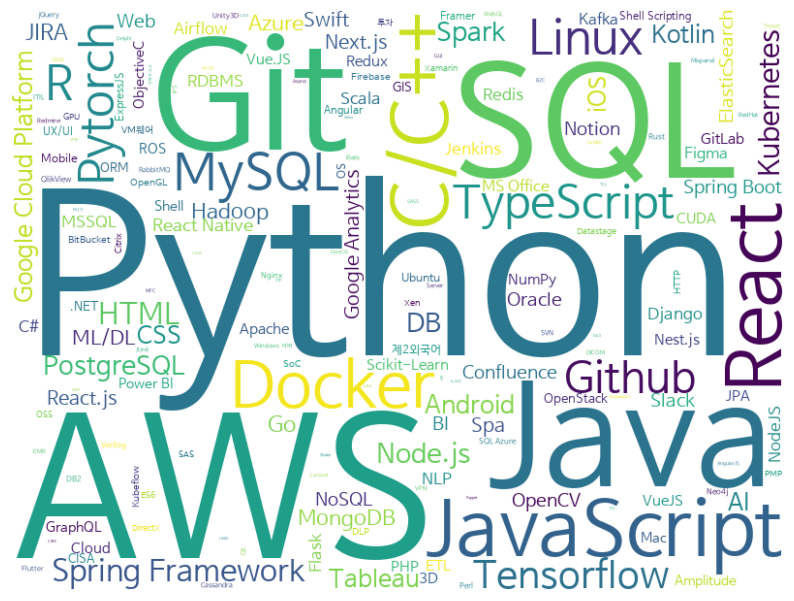

In [47]:
# 전체직군 통합 워드클라우드
WC_maker(all_stack)

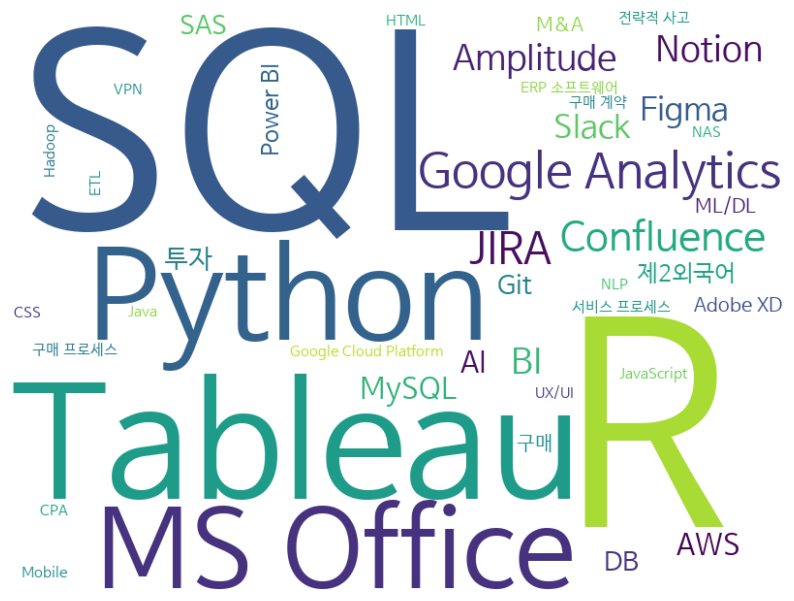

In [48]:
# 데이터 분석가 워드클라우드
WC_maker(ANL_stack)

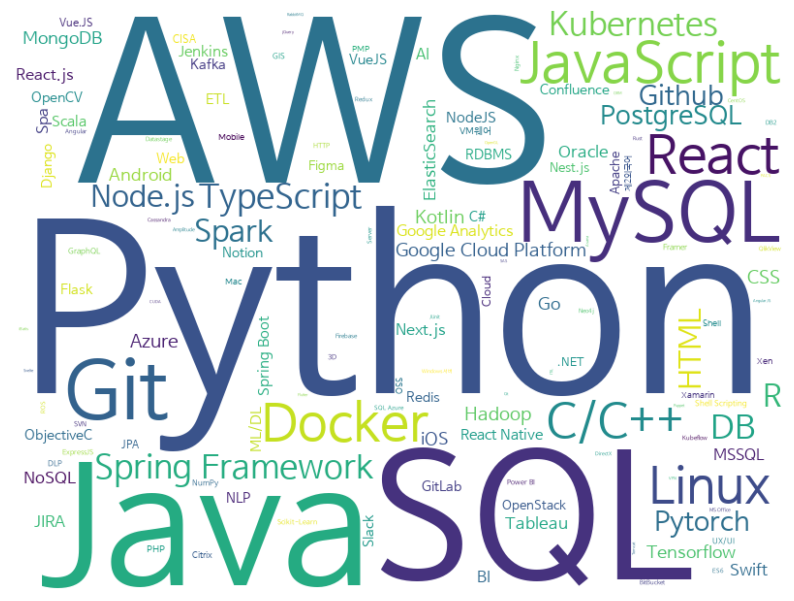

In [49]:
# 데이터 엔지니어 워드클라우드
WC_maker(DE_stack)

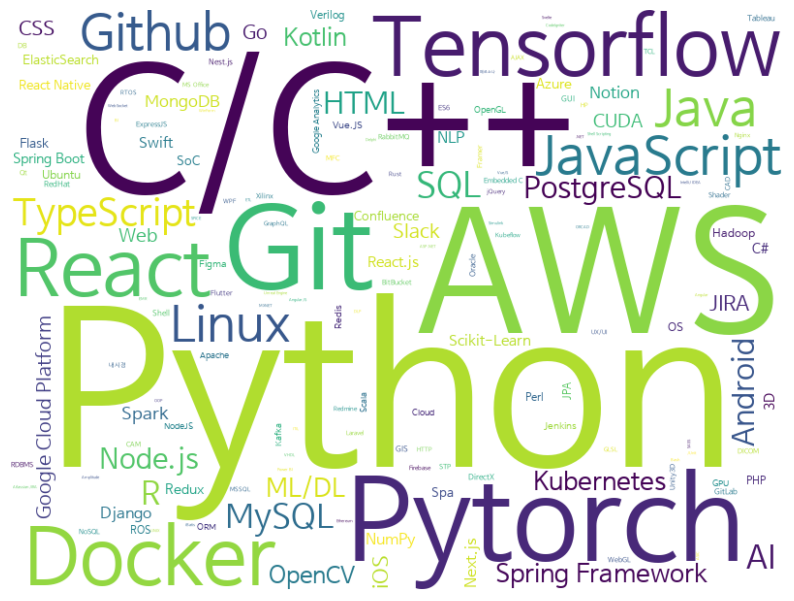

In [50]:
# 머신러닝 엔지니어 워드클라우드
WC_maker(MLE_stack)

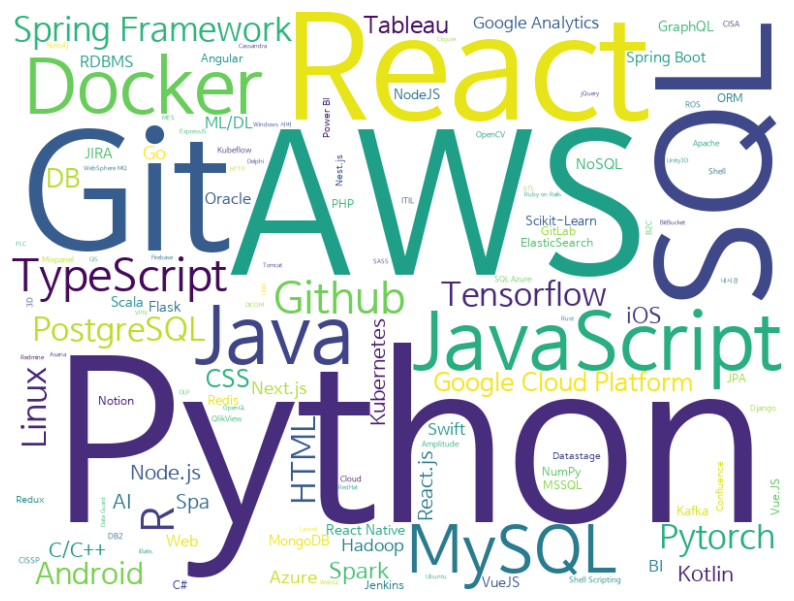

In [51]:
# 데이터 사이언티스트 워드클라우드
WC_maker(SCI_stack)

# 태블로용 데이터 생성

In [101]:
# 직업명 컬럼 추가
DE_stack['job'] = 'DE'
ANL_stack['job'] = 'ANL'
MLE_stack['job'] = 'MLE'
SCI_stack['job'] = 'SCI'

In [102]:
all_job_stack = pd.concat([DE_stack, ANL_stack, MLE_stack, SCI_stack]).reset_index(drop = True)
all_job_stack

,stack,count,job
0,Python,265,DE
1,AWS,236,DE
2,Java,121,DE
3,MySQL,109,DE
4,JavaScript,105,DE
...,...,...,...
530,Asana,1,SCI
531,UNIX,1,SCI
532,Shell,2,SCI
533,Cloud,2,SCI


In [103]:
all_job_stack.to_excel('all_job_stack.xlsx', index = False)